In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as smt

In [3]:
import pickle
with open('pivot_table.pkl', 'rb') as f:
    df_pivot = pickle.load(f)

In [4]:
#OI: should we drop NAs beforehand?
df_pct = df_pivot.dropna().pct_change()[1:]

In [5]:
#reanme columns to 
# fut_dict = {1:'10_year_treasury_note',
#             2: 'e-mini_s&p_500',
#             3: 'ftse_china_a50_index'}
df_pct.columns = [1,2,3]

![Def](lead_lag.png "Def")

In [6]:
#form lags 
for col in df_pct.columns:
    df_pct[f'{col}_lag'] = df_pct[col].shift()


In [7]:
D = 0.2 
for leader in [1,2,3]:
    for follower in [1,2,3]:
        df_pct[f'{leader}_leads_{follower}'] = np.where( ((1-D)*df_pct[f'{leader}_lag'] <= abs(df_pct[follower])) & (abs(df_pct[follower]) <= (1+D)*df_pct[f'{leader}_lag']), True, False )


In [8]:
df_pct

1         2         3     1_lag     2_lag  \
ts                                                                      
2020-01-01 20:02:00  0.000000 -0.000077  0.001035       NaN       NaN   
2020-01-01 20:03:00  0.000000  0.000077  0.000172  0.000000 -0.000077   
2020-01-01 20:04:00  0.000000  0.000077 -0.000344  0.000000  0.000077   
2020-01-01 20:05:00  0.000000  0.000000  0.000172  0.000000  0.000077   
2020-01-01 20:06:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
2021-11-30 21:11:00  0.000000  0.000054  0.000586 -0.000122 -0.000054   
2021-11-30 21:12:00  0.000122 -0.000054 -0.001237  0.000000  0.000054   
2021-11-30 21:13:00  0.000000 -0.000326 -0.000326  0.000122 -0.000054   
2021-11-30 21:18:00  0.000000 -0.000163  0.001434  0.000000 -0.000326   
2021-11-30 21:19:00  0.000000  0.000272  0.000911  0.000000 -0.000163   

                        3_lag  1_leads_1  1_leads_2  1_leads_3  2_leads_1  \
ts                                                                          
2020-01-01 20:02:00       NaN      False      False      False      False   
2020-01-01 20:03:00  0.001035       True      False      False      False   
2020-01-01 20:04:00  0.000172       True      False      False      False   
2020-01-01 20:05:00 -0.000344       True       True      False      False   
2020-01-01 20:06:00  0.000172       True       True       True       True   
...                       ...        ...        ...        ...        ...   
2021-11-30 21:11:00  0.000847      False      False      False      False   
2021-11-30 21:12:00  0.000586      False      False      False      False   
2021-11-30 21:13:00 -0.001237      False      False      False      False   
2021-11-30 21:18:00 -0.000326       True      False      False      False   
2021-11-30 21:19:00  0.001434       True      False      False      False   

                     2_leads_2  2_leads_3  3_leads_1  3_leads_2  3_leads_3  
ts                                                                          
2020-01-01 20:02:00      False      False      False      False      False  
2020-01-01 20:03:00      False      False      False      False      False  
2020-01-01 20:04:00       True      False      False      False      False  
2020-01-01 20:05:00      False      False      False      False      False  
2020-01-01 20:06:00       True       True      False      False      False  
...                        ...        ...        ...        ...        ...  
2021-11-30 21:11:00      False      False      False      False      False  
2021-11-30 21:12:00       True      False      False      False      False  
2021-11-30 21:13:00      False      False      False      False      False  
2021-11-30 21:18:00      False      False      False      False      False  
2021-11-30 21:19:00      False      False      False      False      False  

[429076 rows x 15 columns]

# Draft

In [24]:
shape_filtered = df_pct.filter(regex='leads').shape


In [40]:
#DRAFT

# a = [-1.31895738,  0.31874959, -0.1672273 , -0.25494642,  0.11965223, -0.54394581, -0.77610136,  0.67579558,  0.28588552, -0.21115529, 0.41563989,  0.36720505, -0.12468466, -0.52881205,  0.06350933, 1.41108221, -1.30632325, -0.38406944, -0.66159813, -0.08458887]
# [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]
# np.where(a >= 0, np.where(((0.3<=a) & (a<=0.5)) | ((0.7<=a) & (a<=1.0)), 1, 0),  
#                  np.where(((-0.3>=a) & (a>=-0.5)) | ((-0.7>=a) & (a>= -1.0)), 1, 0))
#should be the same as:
# np.where( ((0.3<=abs(a)) & (abs(a)<=0.5)) | ((0.7<=abs(a)) & (abs(a)<=1.0)), 1, 0)

# RESULT: yes

In [34]:
df_pivot_diff = df_pivot.diff()

In [41]:
plt.plot(df_pivot_diff['10_year_treasury_note'])
plt.plot(df_pivot_diff['10_year_treasury_note'])
plt.plot(df_pivot_diff['10_year_treasury_note'])


df_pivot_diff.columns

Index(['10_year_treasury_note', 'e-mini_s&p_500', 'ftse_china_a50_index'], dtype='object')

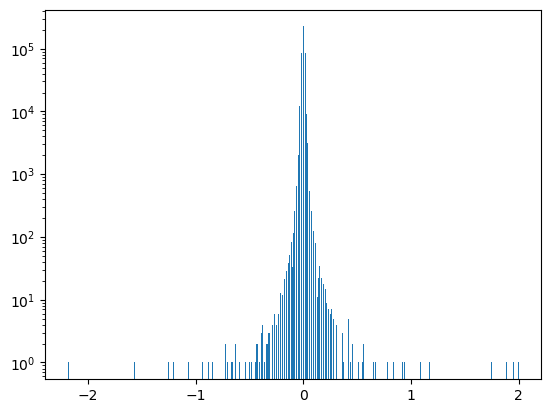

In [40]:
plt.hist(df_pivot_diff['10_year_treasury_note'], bins=500, log=True);


# Draft: plot prices

In [42]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [44]:
df_pivot_diff.head()

10_year_treasury_note  e-mini_s&p_500  \
ts                                                           
2020-01-01 20:01:00                    NaN             NaN   
2020-01-01 20:02:00                    0.0           -0.25   
2020-01-01 20:03:00                    0.0            0.25   
2020-01-01 20:04:00                    0.0            0.25   
2020-01-01 20:05:00                    0.0            0.00   

                     ftse_china_a50_index  
ts                                         
2020-01-01 20:01:00                   NaN  
2020-01-01 20:02:00                  15.0  
2020-01-01 20:03:00                   2.5  
2020-01-01 20:04:00                  -5.0  
2020-01-01 20:05:00                   2.5

In [45]:


traces_lst = []
traces_lst.append({"x": df_pivot_diff.index, "y": df_pivot_diff['10_year_treasury_note'], "name": 'predictions',
                      # "visible":'legendonly',
                           "marker" : {'color' : 'royalblue'}})
# traces_lst.append({"x": preds.index + datetime.timedelta(hours=6) , #
#                    "y": preds['hist_consumption'], "name": 'historical_consumption',
#                       # "visible":'legendonly',
#                            "marker" : {'color' : 'violet'}})


figure = {'data': traces_lst,
          'layout': {'xaxis': {'autorange': True,'title':'Time'},
                     'yaxis': {'autorange': True,'title':'$'},
                     'title': '10_year_treasury_note'}}
f = plotly.offline.plot(figure, filename='prices.html')

In [50]:


traces_lst = []
traces_lst.append({"x": df_pivot.index, "y": df_pivot['10_year_treasury_note'], "name": 'predictions',
                           "marker" : {'color' : 'royalblue'}})
traces_lst.append({"x": df_pivot.index, "y": df_pivot['e-mini_s&p_500'], "name": 'predictions',
                           "marker" : {'color' : 'violet'}})
traces_lst.append({"x": df_pivot.index, "y": df_pivot['ftse_china_a50_index'], "name": 'predictions',
                           "marker" : {'color' : 'brown'}})

figure = {'data': traces_lst,
          'layout': {'xaxis': {'autorange': True,'title':'Time'},
                     'yaxis': {'autorange': True,'title':'$'},
                     'title': '10_year_treasury_note'}}
f = plotly.offline.plot(figure, filename='prices.html')